In [17]:
# ================== Paquetes ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ================== Cargar base ==================
# Asegúrate de subir el archivo "GRAN_TABLA(SIN ID).xlsx" al entorno de Colab antes de correr esto
df = pd.read_excel("/content/GRAN_TABLA(SIN ID).xlsx")

# ================== Vista general ==================
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])
print("\nNombres de variables:\n", df.columns.tolist())

# Tipos de datos
print("\nTipos de datos:\n", df.dtypes)

# Primeras filas
df.head()


Filas: 50891
Columnas: 23

Nombres de variables:
 ['NME_CONVOCATORIA', 'ANO_CONVO', 'NME_ESP_AREA_PR', 'NME_AREA_PR', 'NME_GRAN_AREA_PR', 'NME_GENERO_PR', 'NME_PAIS_NAC_PR', 'NME_REGION_NAC_PR', 'NME_DEPARTAMENTO_NAC_PR', 'NME_MUNICIPIO_NAC_PR', 'NME_NIV_FORM_PR', 'NRO_ORDEN_FORM_PR', 'NME_CLASIFICACION_PR', 'ORDEN_CLAS_PR', 'EDAD_ANOS_PR', 'NME_PAIS_RES_PR', 'NME_REGION_RES_PR', 'NME_DEPARTAMENTO_RES_PR', 'NME_MUNICIPIO_RES_PR', 'ID_VICTIMA_CONFLICTO', 'TXT_GRUPO_ETNICO', 'TXT_POBLACION_DISCA', 'INST_FILIA']

Tipos de datos:
 NME_CONVOCATORIA            object
ANO_CONVO                   object
NME_ESP_AREA_PR             object
NME_AREA_PR                 object
NME_GRAN_AREA_PR            object
NME_GENERO_PR               object
NME_PAIS_NAC_PR             object
NME_REGION_NAC_PR           object
NME_DEPARTAMENTO_NAC_PR     object
NME_MUNICIPIO_NAC_PR        object
NME_NIV_FORM_PR             object
NRO_ORDEN_FORM_PR            int64
NME_CLASIFICACION_PR        object
ORDEN_CLAS_P

,NME_CONVOCATORIA,ANO_CONVO,NME_ESP_AREA_PR,NME_AREA_PR,NME_GRAN_AREA_PR,NME_GENERO_PR,NME_PAIS_NAC_PR,NME_REGION_NAC_PR,NME_DEPARTAMENTO_NAC_PR,NME_MUNICIPIO_NAC_PR,...,ORDEN_CLAS_PR,EDAD_ANOS_PR,NME_PAIS_RES_PR,NME_REGION_RES_PR,NME_DEPARTAMENTO_RES_PR,NME_MUNICIPIO_RES_PR,ID_VICTIMA_CONFLICTO,TXT_GRUPO_ETNICO,TXT_POBLACION_DISCA,INST_FILIA
0,Convocatoria 781 de 2017,12/05/2017,Física de la Materia,Ciencias Físicas,Ciencias Naturales,Masculino,Colombia,Caribe,Sucre,Los Palmitos,...,14,54.48,Colombia,Caribe,Atlántico,Barranquilla,No registra,No disponible,No disponible,NaN
1,Convocatoria 781 de 2017,12/05/2017,Sociología,Sociología,Ciencias Sociales,Masculino,Exterior,Exterior,Exterior,Exterior,...,13,51.92,Colombia,Pacífico,Valle del Cauca,Cali,No registra,No disponible,No disponible,UNIVERSIDAD DEL VALLE
2,Convocatoria 781 de 2017,12/05/2017,Matemáticas Puras,Matemática,Ciencias Naturales,Masculino,Colombia,Eje Cafetero,Antioquia,Medellín,...,12,62.39,Colombia,Eje Cafetero,Antioquia,Medellín,No registra,No disponible,No disponible,NaN
3,Convocatoria 781 de 2017,12/05/2017,Matemáticas Aplicadas,Matemática,Ciencias Naturales,Masculino,Colombia,Eje Cafetero,Antioquia,Medellín,...,14,61.82,Colombia,Eje Cafetero,Antioquia,Medellín,No registra,No disponible,No disponible,NaN
4,Convocatoria 781 de 2017,12/05/2017,Matemáticas Puras,Matemática,Ciencias Naturales,Femenino,Colombia,Eje Cafetero,Antioquia,Medellín,...,13,59.60,Colombia,Eje Cafetero,Antioquia,Medellín,No registra,No disponible,No disponible,NaN


In [18]:
# ================== Separar por tipo ==================
# Numéricas
num_vars = ['NRO_ORDEN_FORM_PR', 'ORDEN_CLAS_PR', 'EDAD_ANOS_PR']

# Temporales (convertimos a numérico)
df['ANO_CONVO'] = pd.to_numeric(df['ANO_CONVO'], errors='coerce')
temp_vars = ['ANO_CONVO']

# Categóricas: todas las demás
cat_vars = [col for col in df.columns if col not in num_vars + temp_vars]

print("Variables numéricas:", num_vars)
print("Variables temporales:", temp_vars)
print("Variables categóricas (total: {})".format(len(cat_vars)))
print(cat_vars[:10], "...")  # mostramos solo las primeras 10


Variables numéricas: ['NRO_ORDEN_FORM_PR', 'ORDEN_CLAS_PR', 'EDAD_ANOS_PR']
Variables temporales: ['ANO_CONVO']
Variables categóricas (total: 19)
['NME_CONVOCATORIA', 'NME_ESP_AREA_PR', 'NME_AREA_PR', 'NME_GRAN_AREA_PR', 'NME_GENERO_PR', 'NME_PAIS_NAC_PR', 'NME_REGION_NAC_PR', 'NME_DEPARTAMENTO_NAC_PR', 'NME_MUNICIPIO_NAC_PR', 'NME_NIV_FORM_PR'] ...


Resumen de variables numéricas:

                     count       mean        std    min    25%   50%      75%  \
NRO_ORDEN_FORM_PR  50891.0  16.493250   1.009178   0.00  16.00  17.0  17.0000   
ORDEN_CLAS_PR      50891.0  12.545578   0.749887  12.00  12.00  12.0  13.0000   
EDAD_ANOS_PR       50890.0  44.620177  13.988156  16.92  36.83  43.0  51.4975   

                      max  missing_%  
NRO_ORDEN_FORM_PR   18.00   0.000000  
ORDEN_CLAS_PR       15.00   0.000000  
EDAD_ANOS_PR       956.25   0.001965  


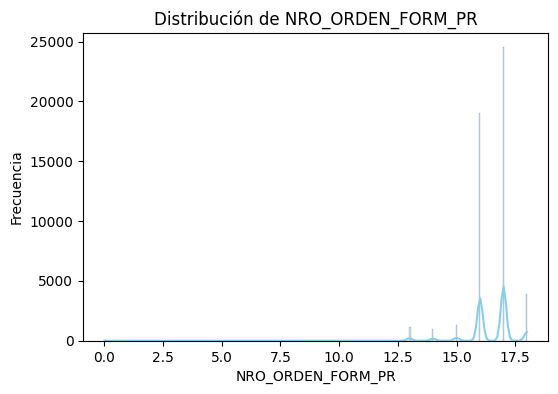

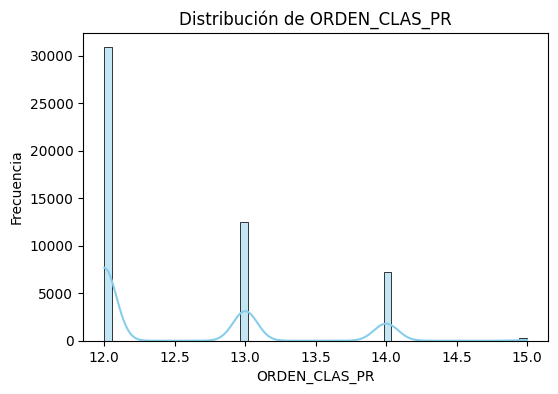

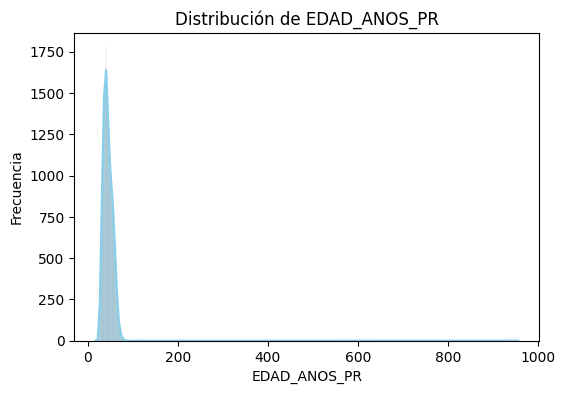

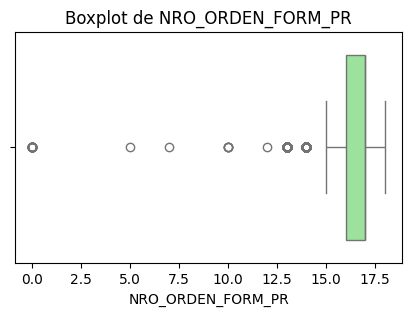

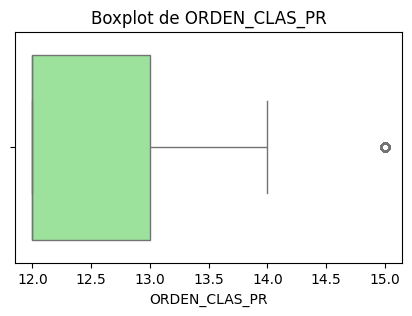

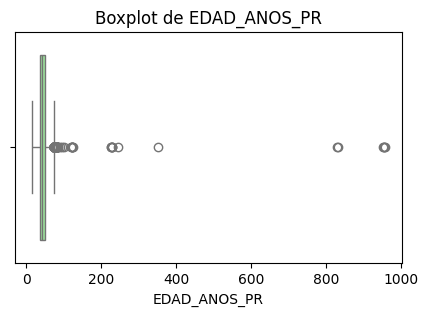

In [19]:
# ================== Estadísticos básicos ==================
num_summary = df[num_vars].describe().T
num_summary['missing_%'] = df[num_vars].isnull().mean() * 100

print("Resumen de variables numéricas:\n")
print(num_summary)

# ================== Histogramas ==================
for col in num_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# ================== Boxplots ==================
for col in num_vars:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot de {col}")
    plt.show()



===== NME_CONVOCATORIA =====
NME_CONVOCATORIA
Convocatoria 894 de 2021    21094
Convocatoria 833 de 2018    16796
Convocatoria 781 de 2017    13001
Name: count, dtype: int64

Porcentaje de datos faltantes: 0.0 %

===== NME_ESP_AREA_PR =====
NME_ESP_AREA_PR
Educación General (Incluye Capacitación, Pedagogía)                                                      3402
Negocios y Management                                                                                    2534
Derecho                                                                                                  2067
Ingeniería Eléctrica y Electrónica                                                                       1972
Economía                                                                                                 1447
Psicología (Incluye Terapias de Aprendizaje, Habla, Visual y Otras Discapacidades Físicas y Mentales)    1356
Salud Pública                                                                     

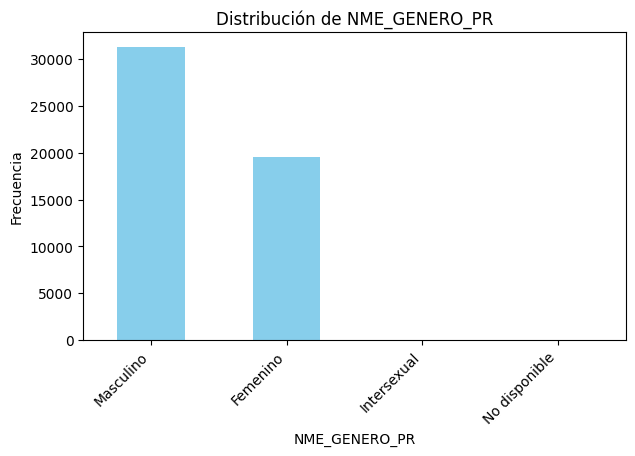

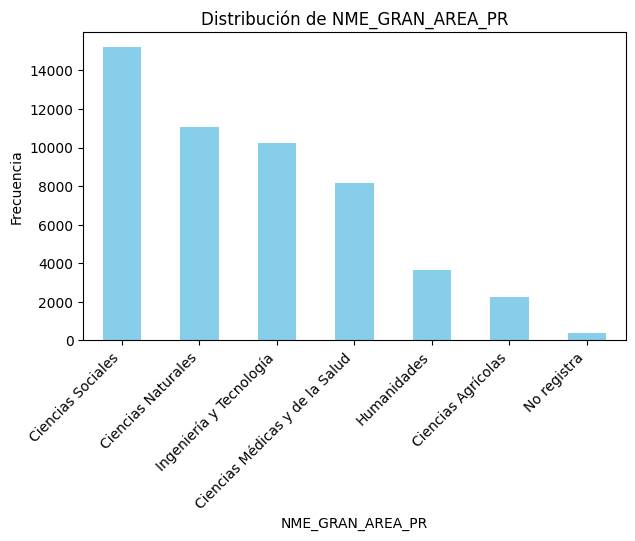

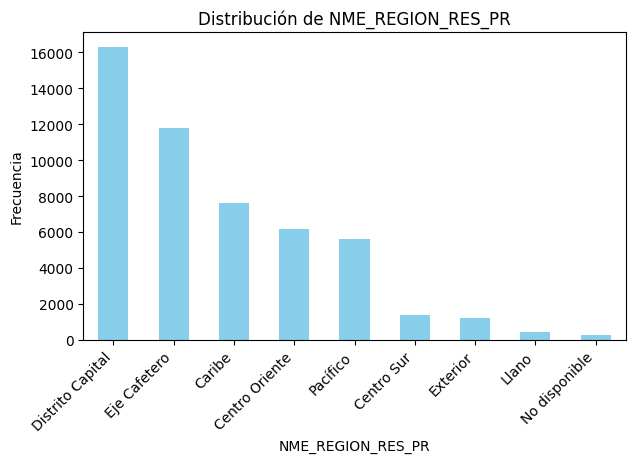

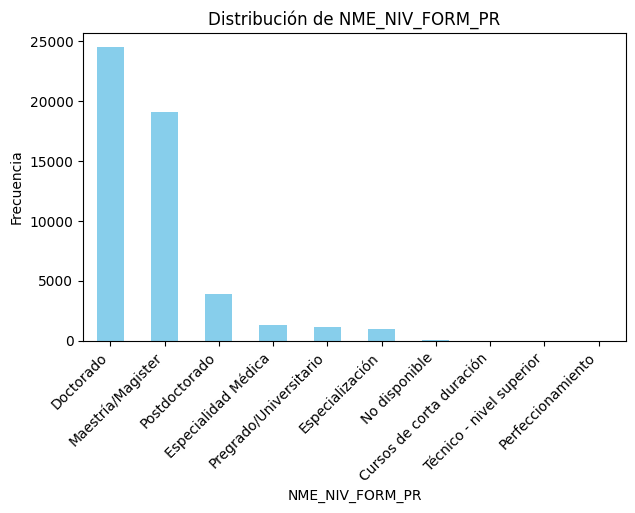

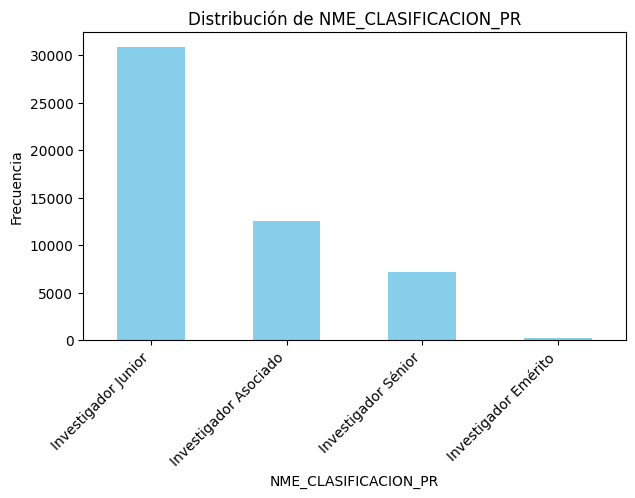

In [20]:
# ================== Frecuencias y proporciones ==================
for col in cat_vars:
    print(f"\n===== {col} =====")
    print(df[col].value_counts(dropna=False).head(10))  # las 10 más comunes
    print("\nPorcentaje de datos faltantes:", df[col].isna().mean() * 100, "%")

# ================== Visualizaciones simples ==================
# Vamos a graficar solo algunas claves para no saturar la salida

cols_viz = ['NME_GENERO_PR', 'NME_GRAN_AREA_PR', 'NME_REGION_RES_PR', 'NME_NIV_FORM_PR', 'NME_CLASIFICACION_PR']

for col in cols_viz:
    plt.figure(figsize=(7,4))
    df[col].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f"Distribución de {col}")
    plt.ylabel("Frecuencia")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.show()


Años detectados: [2017, 2019, 2021]

Número de investigadores por convocatoria:
ANO_CONVO_ANO
2017    13001
2019    16796
2021    21094
Name: count, dtype: int64


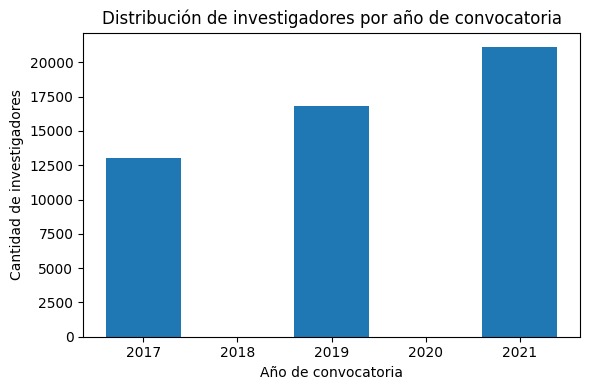

In [22]:
# --- 1) Vuelve a leer SOLO la columna ANO_CONVO desde el Excel ---
# (ajusta la ruta si tu archivo está en otro sitio)
ruta = "/content/GRAN_TABLA(SIN ID).xlsx"
ano_convo_excel = pd.read_excel(ruta, usecols=["ANO_CONVO"])

# Reinyectar en tu df ya cargado
df["ANO_CONVO_ORIG"] = ano_convo_excel["ANO_CONVO"]

# --- 2) Parseo robusto a fecha ---
# Intento A: texto 'dd/mm/aaaa'
s = df["ANO_CONVO_ORIG"].astype(str).str.strip()
s_dt = pd.to_datetime(s, dayfirst=True, errors="coerce")

# Intento B (respaldo): serial de Excel (por si vinieran como números)
s_num = pd.to_numeric(s, errors="coerce")
s_dt2 = pd.to_datetime(s_num, unit="D", origin="1899-12-30", errors="coerce")

# Usar el mejor de los dos intentos
df["ANO_CONVO_FECHA"] = s_dt.where(s_dt.notna(), s_dt2)
df["ANO_CONVO_ANO"] = df["ANO_CONVO_FECHA"].dt.year

# --- 3) Conteo y gráfico ---
conteo_ano = df["ANO_CONVO_ANO"].dropna().value_counts().sort_index()
print("Años detectados:", conteo_ano.index.tolist())
print("\nNúmero de investigadores por convocatoria:")
print(conteo_ano)

plt.figure(figsize=(6,4))
plt.bar(conteo_ano.index.astype(int), conteo_ano.values)
plt.title("Distribución de investigadores por año de convocatoria")
plt.xlabel("Año de convocatoria")
plt.ylabel("Cantidad de investigadores")
plt.tight_layout()
plt.show()
